In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
admission_data = pd.read_csv('Admission_Predict.csv')

In [3]:
admission_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#Check for null
admission_data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
admission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
admission_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [7]:
data=admission_data.copy()

In [8]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
#Drop the serial no. as it doesnt provide any information
data.drop(['Serial No.'],axis=1,inplace=True)

In [10]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
#Renaming the columns as per standards
data.rename(columns={'GRE Score': 'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','Chance of Admit':'Chance_of_Admit'},inplace=True)

In [12]:
data.rename(columns={'Chance of Admit ':'Chance_of_Admit'},inplace=True)

In [13]:
data.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


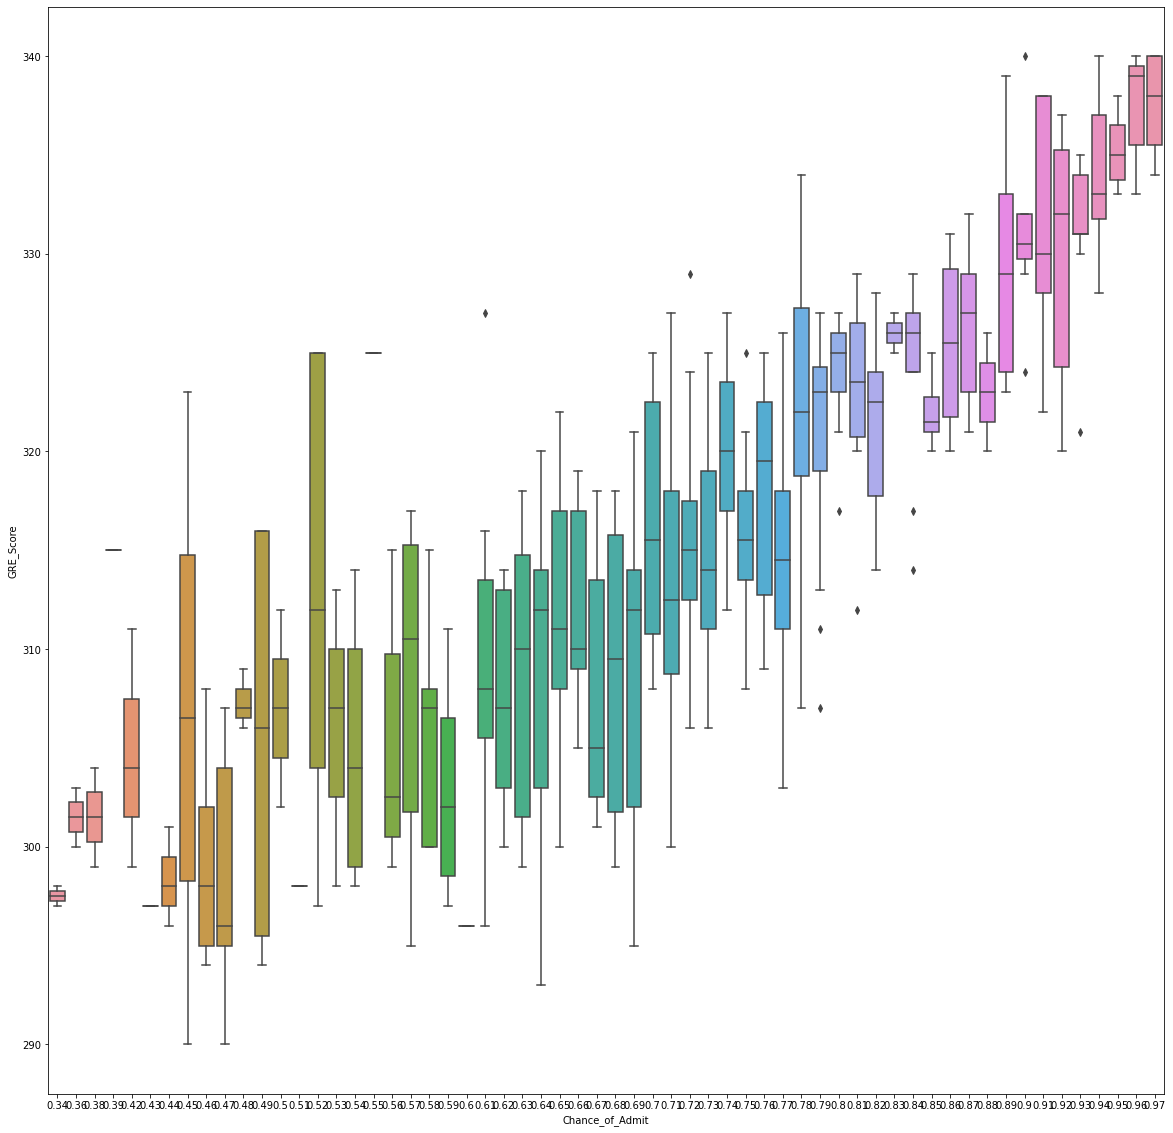

In [14]:
#EDA
plt.figure(figsize=(20,20))
x=data.Chance_of_Admit
y=data.GRE_Score
sns.boxplot(x,y)

### Higher the GRE score more are the chances of admit

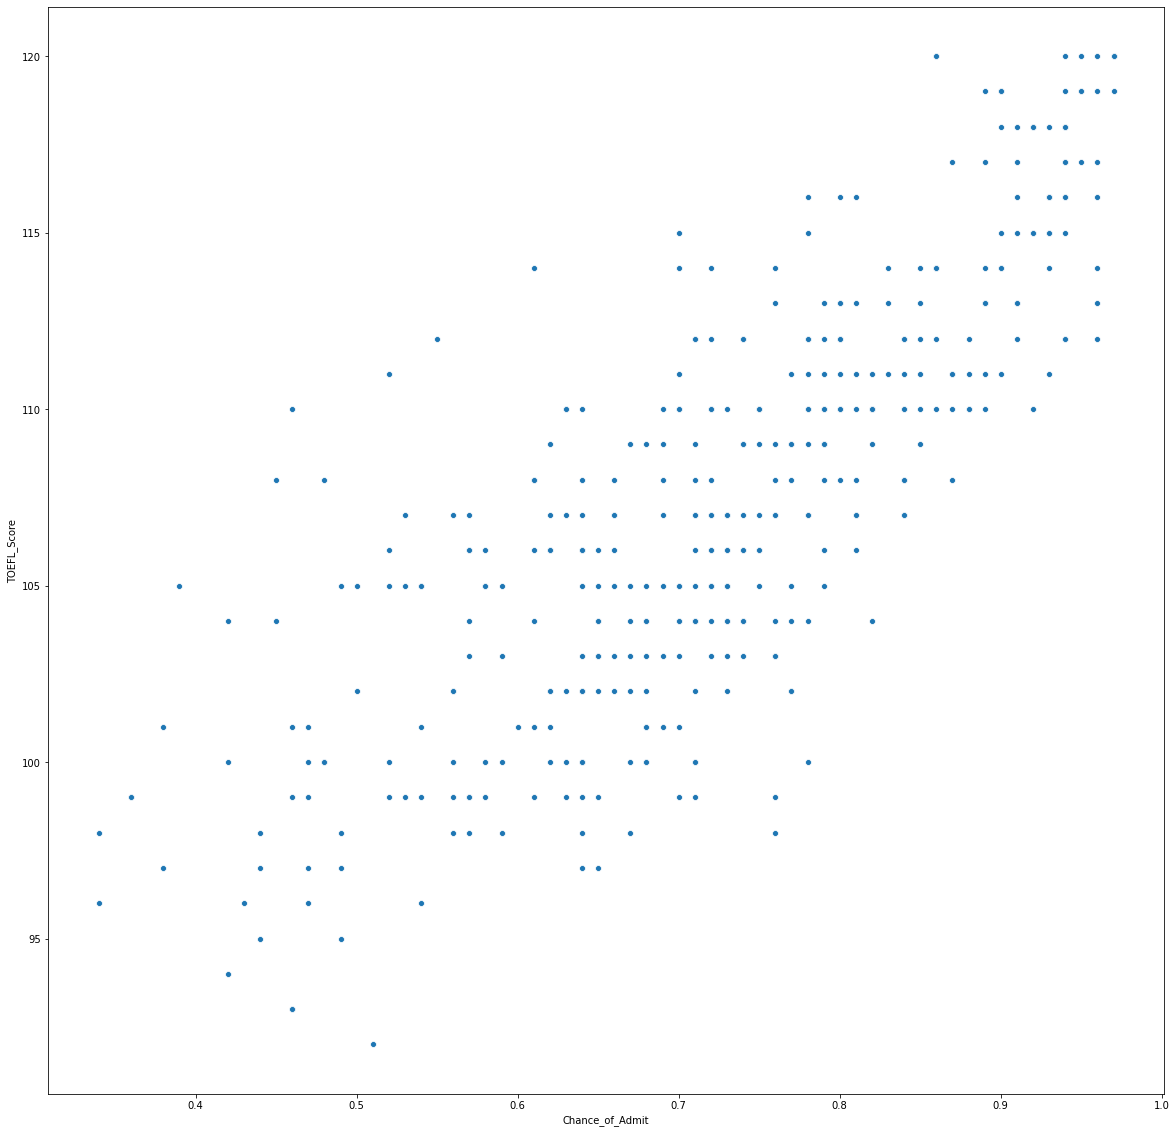

In [15]:
plt.figure(figsize=(20,20))
x=data.Chance_of_Admit
y=data.TOEFL_Score
sns.scatterplot(x,y)

### Higher the TOEFL score more are the chances for admit

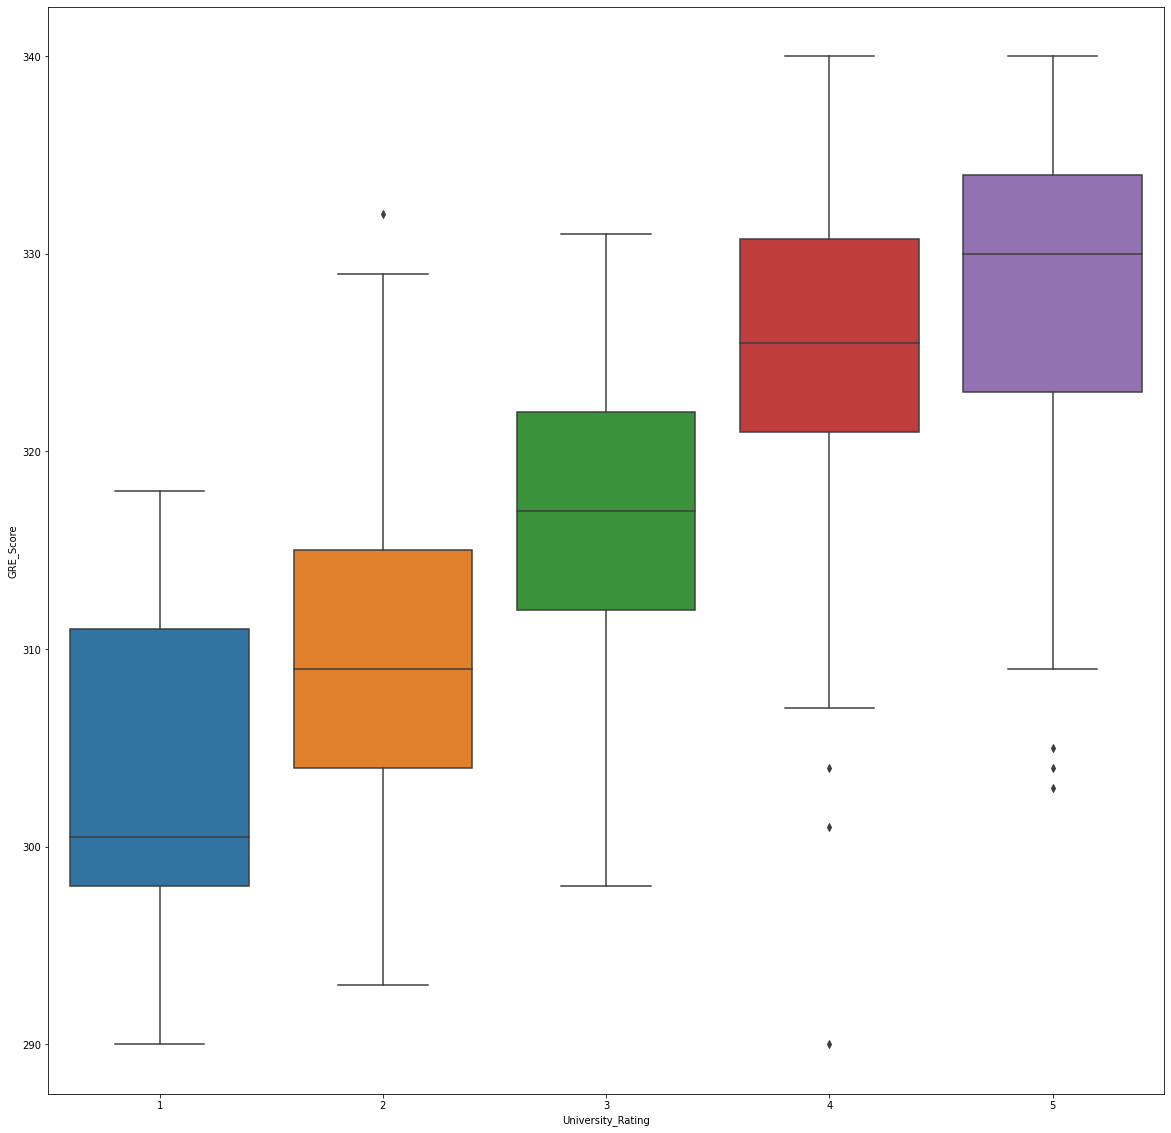

In [16]:
plt.figure(figsize=(20,20))
x=data.University_Rating
y=data.GRE_Score
sns.boxplot(x,y)

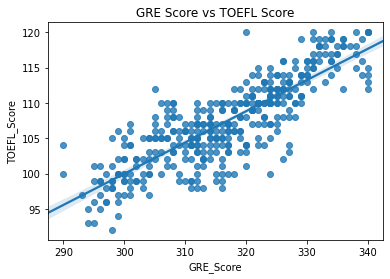

In [17]:
fig = sns.regplot(x="GRE_Score", y="TOEFL_Score", data=data)
plt.title("GRE Score vs TOEFL Score")
plt.show()

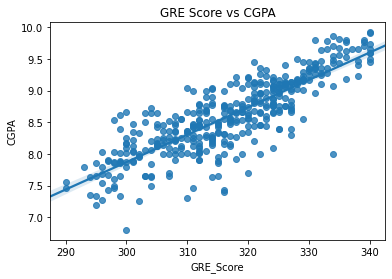

In [18]:
fig = sns.regplot(x="GRE_Score", y="CGPA", data=data)
plt.title("GRE Score vs CGPA")
plt.show()

### Plot clearly shows that those with high cgpa have high GRE score

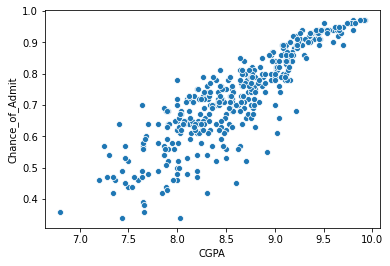

In [19]:
x=data.CGPA
y=data.Chance_of_Admit
sns.scatterplot(x,y)

In [20]:
#Model building
from sklearn.model_selection import train_test_split

In [21]:
X=data.drop(['Chance_of_Admit'],axis=1)
y=data['Chance_of_Admit']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)

In [23]:
import xgboost

In [24]:
mod=xgboost.XGBRegressor()

In [25]:
mod.fit(X_train,y_train)

E:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:19:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [26]:
pred=mod.predict(X_test)

In [27]:
pred

array([0.8579774 , 0.6786871 , 0.9349188 , 0.6747031 , 0.64731437,
       0.7388787 , 0.7691086 , 0.8896256 , 0.8361071 , 0.5813542 ,
       0.85554814, 0.64928705, 0.9434608 , 0.66551524, 0.74436116,
       0.76710814, 0.7426976 , 0.61251116, 0.7002945 , 0.46231568,
       0.72521794, 0.5966526 , 0.6337741 , 0.7809947 , 0.759096  ,
       0.6560596 , 0.85058683, 0.6085495 , 0.6567731 , 0.81248343,
       0.7265738 , 0.74799883, 0.52476317, 0.7091378 , 0.3705567 ,
       0.9322867 , 0.8291934 , 0.86089134, 0.7869778 , 0.7432911 ,
       0.64663684, 0.62972176, 0.8159957 , 0.4831274 , 0.75569344,
       0.45721623, 0.74080503, 0.71147865, 0.7593509 , 0.7977965 ,
       0.80214655, 0.6979752 , 0.76407766, 0.69309163, 0.7775846 ,
       0.8557398 , 0.6141458 , 0.70983064, 0.7596272 , 0.5234765 ,
       0.64748603, 0.48997664, 0.7267882 , 0.60777605, 0.8154361 ,
       0.7684082 , 0.648415  , 0.5088053 , 0.7522819 , 0.57597554,
       0.48569706, 0.75277674, 0.91811734, 0.7388464 , 0.64543

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
np.sqrt(mean_squared_error(y_test, pred))

0.07724293890772937

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf_mod = RandomForestRegressor()

In [32]:
rf_mod.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
rf_pred=rf_mod.predict(X_test)

In [34]:
np.sqrt(mean_squared_error(y_test, rf_pred))

0.07952289188235882

In [35]:
#Hyper parameter tuning for random forest
n_estimators = [100, 300, 500, 800]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
params=dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [38]:
tuned_model = RandomizedSearchCV(rf_mod,param_distributions=params,cv=5)

In [39]:
tuned_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 8, 15, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 300, 500, 800]})

In [40]:
tuned_model.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_depth': 25}

In [41]:
new_pred=tuned_model.predict(X_test)

In [42]:
np.sqrt(mean_squared_error(y_test, new_pred))

0.07533974915041232

In [43]:
tuned_model.score(X_test,y_test)

0.7273838779801636

In [44]:
tuned_model.score(X_train,y_train)

0.8559869117485805

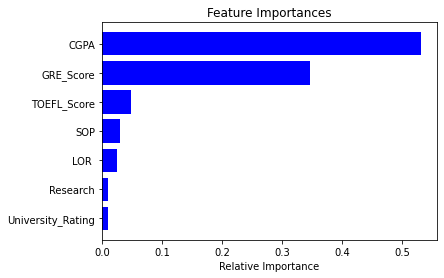

In [50]:
#Plotting import features
features = data.columns
importances = rf_mod.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### from plot its clear that CGPA and GRE_SCORE are key in admission process